In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines import WeibullFitter
from lifelines import ExponentialFitter
from lifelines import LogNormalFitter

In [95]:
data = pd.read_csv('datasets/echocardiogram.csv')

In [96]:
data.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [97]:
has_pericardial_effusion = data[data['pericardialeffusion'] == 1.0]
none_pericardial_effusion = data[data['pericardialeffusion'] == 0.0]

has_pericardial_effusion = has_pericardial_effusion[['survival', 'alive', 'age', 'pericardialeffusion', 'name']]
none_pericardial_effusion = none_pericardial_effusion[['survival', 'alive', 'age', 'pericardialeffusion', 'name']]

has_pericardial_effusion['observed'] = has_pericardial_effusion['alive'] + 1.0
has_pericardial_effusion['observed'] = has_pericardial_effusion['observed'].replace(2.0, 0.0)

none_pericardial_effusion['observed'] = none_pericardial_effusion['alive'] + 1.0
none_pericardial_effusion['observed'] = none_pericardial_effusion['observed'].replace(2.0, 0.0)

has_pericardial_effusion = has_pericardial_effusion.dropna()
none_pericardial_effusion = none_pericardial_effusion.dropna()

## Heart disease patient survival
You're a data scientist at a clinical research organization that studies heart diseases. You wonder if pericardial effusion, fluid build-up around the heart, affects heart attack patients' survival outcomes. In this exercise, you will explore how to use two statistical methods to compare survival distributions from patients with and without pericardial effusion.

The data is split up into two DataFrames:

* ```has_pericardial_effusion```: patients with pericardial effusion
* ```none_pericardial_effusion```: patients without pericardial effusion 

The ```pandas``` package is loaded as `pd` and the `KaplanMeierFitter` class is imported from lifelines.

In [98]:
# Instantiate Kaplan Meier object for patients with and without pericardial effusion
kmf_has_pe = KaplanMeierFitter()
kmf_no_pe = KaplanMeierFitter()

# Fit Kaplan Meier estimators to each DataFrame
kmf_has_pe.fit(durations=has_pericardial_effusion['survival'], 
          event_observed=has_pericardial_effusion['observed'])
kmf_no_pe.fit(durations=none_pericardial_effusion['survival'], 
          event_observed=none_pericardial_effusion['observed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 101 total observations, 28 right-censored observations>

In [99]:
# Print out the median survival duration of each group
print("The median survival duration (months) of patients with pericardial effusion: ", kmf_has_pe.median_survival_time_)
print("The median survival duration (months) of patients without pericardial effusion: ", kmf_no_pe.median_survival_time_)

The median survival duration (months) of patients with pericardial effusion:  27.0
The median survival duration (months) of patients without pericardial effusion:  31.0


Based on the data, Patients without pericardial effusion have a longer lifetime than patients with pericardial effusion.

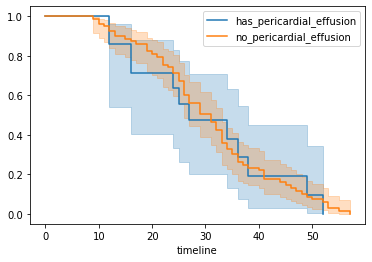

In [100]:
kmf = KaplanMeierFitter()

# Fit kmf to patients with pericardial effusion
kmf.fit(has_pericardial_effusion['survival'], has_pericardial_effusion['observed'], label='has_pericardial_effusion')

# Create a plot of the survival function
surv_plot = kmf.plot()

# Fit kmf to patients without pericardial effusion
kmf.fit(none_pericardial_effusion['survival'], none_pericardial_effusion['observed'], label='no_pericardial_effusion')

# Plot new survival function and show plot
kmf.plot(ax=surv_plot)
plt.show()

In [101]:
# Fit kmf to patients without pericardial effusion
kmf.fit(none_pericardial_effusion['survival'], none_pericardial_effusion['observed'], label='no_pericardial_effusion')

# Plot new survival function and show plot
kmf.plot(ax=surv_plot)
plt.show()

In [102]:
# Import logrank_test
from lifelines.statistics import logrank_test

# Run log-rank test to compare patients with and without pericardial effusion
patient_results = logrank_test(has_pericardial_effusion['survival'],
                                none_pericardial_effusion['survival'],
                                has_pericardial_effusion['observed'],
                                none_pericardial_effusion['observed'])

patient_results							

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.03 0.86      0.21

In [103]:
# Import logrank_test
from lifelines.statistics import logrank_test

# Run log-rank test to compare patients with and without pericardial effusion
patient_results = logrank_test(durations_A = has_pericardial_effusion['survival'], 
                               durations_B = none_pericardial_effusion['survival'], 
                               event_observed_A = has_pericardial_effusion['observed'], 
                               event_observed_B = none_pericardial_effusion['observed'])

# Print out the p-value of log-rank test results
print(patient_results.p_value)

0.8648679727247761


The null hypothesis is that patients with and without pericardial effusion have the same survival curves. Given this null hypothesis and the p-value you just calculated, we cannot reject the null hypothesis.

In [104]:
# Import WeibullAFTFitter and instantiate
from lifelines import WeibullAFTFitter
aft = WeibullAFTFitter()

data['observed'] = data['alive'] + 1.0
data['observed'] = data['observed'].replace(2.0, 0.0)
data = data[['survival', 'age', 'pericardialeffusion', 'fractionalshortening', 'epss', 'lvdd', 'wallmotion-score', 'wallmotion-index', 'observed']]
data = data.dropna()
print(data.shape)

# Fit heart_patients data into aft
aft.fit(df=data, duration_col='survival', event_col='observed')

# Print the summary
print(aft.summary)

# Calculate the exponential of EPSS coefficient
exp_epss = np.exp(aft.params_.loc['lambda_'].loc['epss'])
print('When EPSS increases by 1, the average survival duration changes by a factor of ', exp_epss)

(106, 9)
                                  coef  exp(coef)  se(coef)  coef lower 95%  \
param   covariate                                                             
lambda_ age                   0.006020   1.006038  0.005500       -0.004759   
        epss                 -0.008989   0.991052  0.009334       -0.027283   
        fractionalshortening  0.211862   1.235978  0.443839       -0.658046   
        lvdd                  0.040572   1.041406  0.063635       -0.084151   
        pericardialeffusion   0.013670   1.013764  0.120826       -0.223144   
        wallmotion-index      0.039012   1.039783  0.215421       -0.383206   
        wallmotion-score     -0.002955   0.997050  0.018639       -0.039486   
        Intercept             3.025244  20.599021  0.444623        2.153799   
rho_    Intercept             1.032141   2.807070  0.090551        0.854665   

                              coef upper 95%  exp(coef) lower 95%  \
param   covariate                                   

In [105]:
# Instantiate each fitter
wb = WeibullFitter()
exp = ExponentialFitter()
log = LogNormalFitter()

# Fit to data
for model in [wb, exp, log]:
  model.fit(durations=data['survival'],
            event_observed=data['observed'])
  # Print AIC
  print(model.__class__.__name__, model.AIC_)

WeibullFitter 587.6146059960347
ExponentialFitter 667.5437127520208
LogNormalFitter 592.6526580505488
